# **SysML v2 Language Demonstration**
# *Systems Engineering DSIG<br/>Virtual OMG Meeting</br>23 March 2021*

## Trade Studies

In [9]:
import ScalarValues::Real;

part def Engine {
    attribute power :> ISQ::power;
    attribute mass :> ISQ::mass;
    attribute efficiency : Real;
    attribute cost : Real;
}
part def Cylinder;

part engine : Engine {
    part cylinder : Cylinder[2..*];
}

part engine4cyl :> engine {
    part :>> cylinder[4];
    // ...
}

part engine6cyl :> engine {
    part :>> cylinder[6];
    // ...
}

PartDefinition Engine (b870921c-53de-4d45-ad47-9bc88651bcbf)
PartDefinition Cylinder (2e763165-874e-434c-aabc-7af9c071bc41)
PartUsage engine (21bae253-0170-4e2e-9515-3fa413c53825)
PartUsage engine4cyl (00040192-0017-4cce-943e-81c3bd8117ee)
PartUsage engine6cyl (584c4569-52b6-42c1-bbb6-76bf7a5974b9)


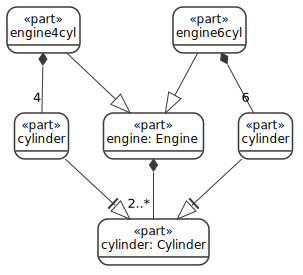

In [10]:
%viz --view=tree engine engine4cyl engine6cyl

In [11]:
import ScalarValues::Real;
import TradeStudies::*;

/** Evaluation function with criteria power, mass, efficency and cost. */
calc def EngineEvaluation
    (power :> ISQ::power, mass :> ISQ::mass, efficiency : Real, cost : Real ) evaluation : Real {
    // Compute evaluation...
}

analysis engineTradeStudy : TradeStudy {
    subject : Engine = {engine4cyl, engine6cyl};
    objective : MaximizeObjective;

    calc :>> objectiveFunction {
        in part engine : Engine;
        return result : Real = EngineEvaluation(
            engine::power, engine::mass, engine::efficiency, engine::cost
        );
    }

    return part : Engine;
}

CalculationDefinition EngineEvaluation (03c325d7-90ce-4d17-ad17-b49a2d3494a4)
AnalysisCaseUsage engineTradeStudy (8d86b4bd-7cc1-4937-ac7f-0727f620cf47)


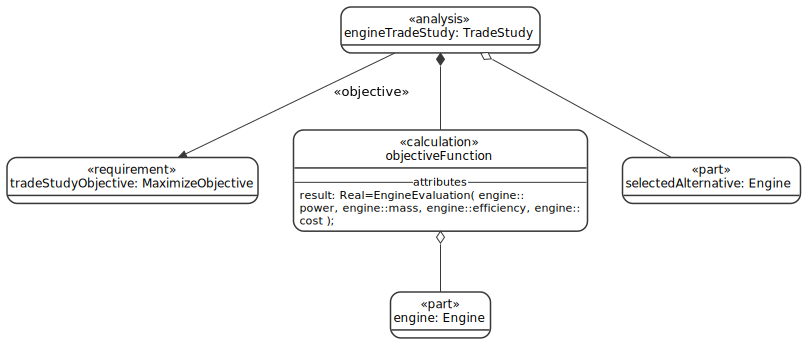

In [12]:
%viz --view=tree engineTradeStudy

## Enumerations

In [13]:
enum def ConditionColor {
    red;
    yellow;
    green;
}

attribute def ConditionLevel {
    attribute associatedColor : ConditionColor;
}

enum def SeverityEnum :> ConditionLevel {
    danger {
        :>> associatedColor = ConditionColor::red;
    }
    warning {
        :>> associatedColor = ConditionColor::yellow;
    }
    normal {
        :>> associatedColor = ConditionColor::green;
    }
}

attribute def Diameter :> ISQ::LengthValue;

enum def DiameterChoice :> Diameter {
    small = 60@[SI::mm];
    medium = 70@[SI::mm];
    large = 80@[SI::mm];
}

attribute aperatureDiameter: DiameterChoice = DiameterChoice::small;

EnumerationDefinition ConditionColor (06eb89f1-a2f7-4de6-88c9-d782fda0ab71)
AttributeDefinition ConditionLevel (b5343176-bc5f-4b45-983d-6ba43c233557)
EnumerationDefinition SeverityEnum (43033f9a-bb9f-4078-be2d-f5f3c0ba55fd)
AttributeDefinition Diameter (71fb5419-740a-47b5-8dae-4da37fb3c8bc)
EnumerationDefinition DiameterChoice (4671f0c3-0812-4ad1-9746-6833ffd28bc1)
AttributeUsage aperatureDiameter (10ac03d3-3a3d-4373-91af-7692373d12ca)


## Metadata Annotation

In [14]:
import ScalarValues::Boolean;

attribute def Security;
attribute def Safety {
    attribute isMandatory : Boolean;
}

AttributeDefinition Security (3356f993-9eab-4f0d-baa5-a08bd9412318)
AttributeDefinition Safety (a1e5bfec-7df0-437c-bfae-1afb1d35d884)


In [15]:
part vehicle {
    part interior {
        part alarm {@Security;}
        part seatBelt[2] {@Safety{isMandatory = true;}}
        part frontSeat[2];
        part driverAirBag {@Safety{isMandatory = false;}}
    }
    part bodyAssy {
        part body;
        part bumper {@Safety{isMandatory = true;}}
        part keylessEntry {@Security;}
    }
    part wheelAssy {
        part wheel[2];
        part antilockBrakes[2] {@Safety{isMandatory = false;}}
    }
}

PartUsage vehicle (65b67177-452b-4375-a13e-dfe3dcf08797)


## Element Filtering

In [16]:
package SafetyFeatures {
    import vehicle::**;
    filter @Safety;
}

package MandatorySafetyFeatures {
    import vehicle::**;
    filter @Safety && Safety::isMandatory;
}

Package SafetyFeatures (86cf24a1-5895-43a9-8bf4-2e66cd847845)
Package MandatorySafetyFeatures (37d03ce1-8315-4548-9a80-75ddfa05d1b9)


In [17]:
%list SafetyFeatures::*

OperatorExpression (21e65783-151c-4c0b-8d4e-a7a8272891bf)
PartUsage antilockBrakes (8c17b79f-a894-4b4d-8459-b0d02bdc8154)
PartUsage bumper (4f28c867-978c-4ec9-b74e-944a7922672a)
PartUsage driverAirBag (bc35649e-081c-4dfd-b184-e7ff1ea3db8a)
PartUsage seatBelt (642ceb02-7f91-4e6c-a973-42bc85d00267)


In [18]:
package SafetyFeatures_ {
    import vehicle::**[@Safety];
}

package MandatorySafetyFeatures_ {
    import vehicle::**[@Safety && Safety::isMandatory];
}

Package SafetyFeatures_ (3eae4943-b680-4bd3-be65-4e2a7c104a54)
Package MandatorySafetyFeatures_ (7e4894a7-de4c-4c1c-a464-7400e436f7e8)


In [19]:
%list SafetyFeatures_::*

PartUsage antilockBrakes (8c17b79f-a894-4b4d-8459-b0d02bdc8154)
PartUsage bumper (4f28c867-978c-4ec9-b74e-944a7922672a)
PartUsage driverAirBag (bc35649e-081c-4dfd-b184-e7ff1ea3db8a)
PartUsage seatBelt (642ceb02-7f91-4e6c-a973-42bc85d00267)


In [20]:
%list MandatorySafetyFeatures_::*

PartUsage bumper (4f28c867-978c-4ec9-b74e-944a7922672a)
PartUsage seatBelt (642ceb02-7f91-4e6c-a973-42bc85d00267)


In [21]:
calc def Check(test);

package MandatorySafetyFeatures_ {
    import vehicle::**[@Safety && Check(Safety::isMandatory)];
}

ERROR:Must be model-level evaluable (21.sysml line : 4 column : 23)


## Allocation

In [22]:
part def LogicalElement;
part def PhysicalElement;

action generateTorque;

part torqueGenerator : LogicalElement {
    perform generateTorque;
}

part powerTrain : PhysicalElement {
    part engine {
        perform generateTorque;
    }
}

allocation def LogicalToPhysical {
    end logical : LogicalElement;
    end physical : PhysicalElement;
}

allocation torqueGenAlloc : LogicalToPhysical allocate logical => torqueGenerator to physical => powerTrain {

    allocate torqueGenerator::generateTorque to powerTrain::engine::generateTorque;
}

PartDefinition LogicalElement (da5b7848-6d0d-47ef-9c47-98089e611813)
PartDefinition PhysicalElement (d15eb4d5-0e5c-42f9-a588-776f172e8ebe)
ActionUsage generateTorque (e8b5232a-1e8e-451b-acd1-7faf734f9cf7)
PartUsage torqueGenerator (45be975d-de84-473e-8a88-3ca4ce4c7f12)
PartUsage powerTrain (f91c9459-3831-4b6e-a9ea-932443865946)
AllocationDefinition LogicalToPhysical (150ce371-b351-47fe-bd1f-11aeaf3e8b8b)
AllocationUsage torqueGenAlloc (ebe7cc57-6e6b-40c8-a13b-730c800c04ba)


## Send and Accept Actions for Ports

In [23]:
import ScalarValues::*;

item def Subscription {
    attribute topic : String;
}

item def Publication {
    attribute topic : String;
    item content;
}

part server {
    port subscriptionServicePort;
    port publicationServicePort;

    exhibit state serverBehavior {
        entry; then registering;

        state registering;
        accept subscription : Subscription for subscriptionServicePort
            do register(topic = subscription::topic)
            then publishing;

        state publishing;
            accept publication : Publication for publicationServicePort
            if isSubscribedTo(topic => publication::topic)
            do send publication to subscriptionServicePort
            then publishing; 
    }

    private action register (in topic : String);
    private calc isSubscribedTo (in topic : String) : Boolean;
}


ItemDefinition Subscription (f6055b97-21d3-4bae-a0b8-f44ac3cbf38b)
ItemDefinition Publication (7261711f-5745-4332-ba32-c6bf0e9aa52f)
PartUsage server (35f42253-3e4e-423c-8d22-d2d90ba32898)
